In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding,SimpleRNN,GRU,LSTM,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [5]:
#Deep RNN

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100)) #time sequence = input_length
model.add(SimpleRNN(5, return_sequences=True))
model.add(SimpleRNN(5))
model.add(Dense(units=1, activation='sigmoid'))

model.build(input_shape=(None, 100))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 100, 5)         │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,251 (1.22 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Define the GRU model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])


model.build(input_shape=(None, 100))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 5)         │           585 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,771 (1.22 MB)

 Trainable params: 320,771 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras import regularizers
# Define the LSTM model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01),
         bias_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    LSTM(5),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.build(input_shape=(None, 100))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 5)         │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 5)              │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,986 (1.22 MB)

 Trainable params: 320,986 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],)


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3)] )

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 109ms/step - accuracy: 0.6543 - loss: 0.7600 - val_accuracy: 0.8241 - val_loss: 0.4354
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.8628 - loss: 0.3828 - val_accuracy: 0.8284 - val_loss: 0.4032
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 114ms/step - accuracy: 0.8980 - loss: 0.2968 - val_accuracy: 0.8355 - val_loss: 0.3975
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.9092 - loss: 0.2697 - val_accuracy: 0.8370 - val_loss: 0.3964
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.9278 - loss: 0.2287 - val_accuracy: 0.8327 - val_loss: 0.4175


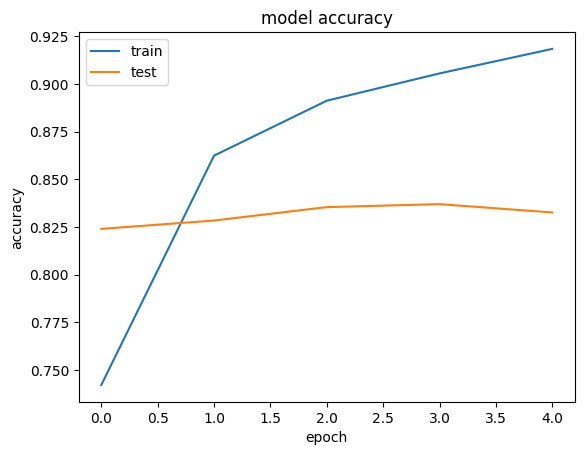

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Text(0, 0.5, 'loss')

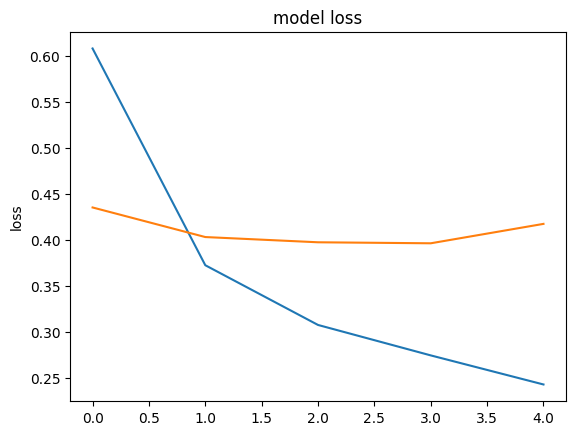

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')